In [16]:
# Compares level 2 data with airplane location data
#
# Author: Brian Pitzel
# Date Created: 3 October 2024
# Date Modified: 7 November 2024

import numpy as np
import h5py 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import csv
import glob
import pickle
import pymap3d as pm
import helpers.airplanes as ap

%matplotlib widget


In [17]:
def map_target(rx, az, el, r):
    """
    Find the scatter location given tx location, rx location, slant range, and target angle-of-arrival
    using the 'WGS84' Earth model. Also determines the bistatic velocity vector and bistatic radar wavelength.

    Parameters
    ----------
        rx : float np.array
            [latitude, longitude, altitude] of rx array in degrees and kilometers
        az : float np.array
            angle-of-arrival azimuth in degrees
        el : float np.array
            angle-of-arrival elevation in degrees
        r : float np.array
            slant range in kilometers

    Returns
    -------
        sx : float np.array
            [latitude, longitude, altitude] of scatter in degrees and kilometers


    Notes
    -----
    rx : receiver location
    sx : scatter location
    gx : geometric center of Earth, origin
    u_rt : unit vector rx to tx
    u_rs : unit vector rx to sx
    u_gt : unit vector gx to tx
    u_gr : unit vector gx to rx
    u_gs : unit vector gx to sx
    """

    # Initialize output arrays
    sx = np.zeros((3, len(r)), dtype=float)

    # Setup variables in correct units for pymap3d
    r = r * 1.0e3
    az = np.where(az < 0.0, az + 360.0, az)
    az = np.deg2rad(az)
    el = np.deg2rad(np.abs(el))

    # WGS84 Model for lat, long, alt
    sx[:, :] = pm.aer2geodetic(np.rad2deg(az), np.rad2deg(el), np.abs(r),
                               np.repeat(rx[0], len(az)),
                               np.repeat(rx[1], len(az)),
                               np.repeat(rx[2], len(az)),
                               ell=pm.Ellipsoid.from_name("wgs84"), deg=True)


    # Convert back to conventional units
    sx[2, :] /= 1.0e3
    return sx


In [18]:
az = np.load('allowed_airplane_azimuth.npy')
el = np.load('allowed_airplane_elevation.npy')
slant_range = np.load('allowed_airplane_slant_range.npy') / 1.0e3
rx = [52.24393, -106.45025, 0]

sx = map_target(rx, az.flatten(), el.flatten(), slant_range.flatten())

In [19]:
SMALL_SIZE = 30 #38
MEDIUM_SIZE = 35 #42
BIGGER_SIZE = 50 #56

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
fig_width_inches = 17
fig_height_inches = 10

In [20]:
# get the level 2 files
y = 2021
m = 3
d = 13
n_days = 1 # how many days starting at and including d-day
level2_files = []
        #f'/mnt/NAS/airplane-data/L2-norelax/{y}/{m:02d}/{y}_{m:02d}_{(d+i):02d}/ib3d_normal_swht_{y}_{m:02d}_{(d+i):02d}_prelate_bakker.h5'
        #f'/mnt/NAS/airplane-data/L2-flip-heading-corr/{y}/{m:02d}/{y}_{m:02d}_{(d+i):02d}/ib3d_normal_swht_{y}_{m:02d}_{(d+i):02d}_prelate_bakker.h5'
        #f'/mnt/NAS/range-corrected-data/L2/{y}/{m:02d}/{y}_{m:02d}_{(d+i):02d}/ib3d_normal_swht_{y}_{m:02d}_{(d+i):02d}_prelate_bakker.h5'
for i in range(n_days):
    #level2_files.append(f'/mnt/NAS/airplane-data/L2-narrow1/{y}/{m:02d}/{y}_{m:02d}_{(d+i):02d}/ib3d_normal_swht_{y}_{m:02d}_{(d+i):02d}_prelate_bakker.h5')
    #level2_files.append(f'/mnt/NAS/airplane-data/L2-calibrated1/{y}/{m:02d}/{y}_{m:02d}_{(d+i):02d}/ib3d_normal_swht_{y}_{m:02d}_{(d+i):02d}_prelate_bakker.h5')
    #level2_files.append(f'/mnt/NAS/airplane-data/L2-recalibrated3_1/{y}/{m:02d}/{y}_{m:02d}_{(d+i):02d}/ib3d_normal_swht_{y}_{m:02d}_{(d+i):02d}_prelate_bakker.h5')
    #level2_files.append(f'/mnt/NAS/airplane-data/L2-antenna-calibrated_1/{y}/{m:02d}/{y}_{m:02d}_{(d+i):02d}/ib3d_normal_swht_{y}_{m:02d}_{(d+i):02d}_prelate_bakker.h5')
    #level2_files.append(f'/mnt/NAS/airplane-data/L2-median-calibrated_1/{y}/{m:02d}/{y}_{m:02d}_{(d+i):02d}/ib3d_normal_swht_{y}_{m:02d}_{(d+i):02d}_prelate_bakker.h5')
    #level2_files.append(f'/mnt/NAS/airplane-data/L2-low-stdev_1/{y}/{m:02d}/{y}_{m:02d}_{(d+i):02d}/ib3d_normal_swht_{y}_{m:02d}_{(d+i):02d}_prelate_bakker.h5')
    #level2_files.append(f'/mnt/NAS/airplane-data/L2-first-airplane_1/{y}/{m:02d}/{y}_{m:02d}_{(d+i):02d}/ib3d_normal_swht_{y}_{m:02d}_{(d+i):02d}_prelate_bakker.h5')
    #level2_files.append(f'/mnt/NAS/airplane-data/L2-new-coeffs_1/{y}/{m:02d}/{y}_{m:02d}_{(d+i):02d}/ib3d_normal_swht_{y}_{m:02d}_{(d+i):02d}_prelate_bakker.h5')
    #level2_files.append(f'/mnt/NAS/airplane-data/L2-new-coeffs-with-cal_1/{y}/{m:02d}/{y}_{m:02d}_{(d+i):02d}/ib3d_normal_swht_{y}_{m:02d}_{(d+i):02d}_prelate_bakker.h5')
    #level2_files.append(f'/mnt/NAS/airplane-data/L2-new-coeffs-with-cal-and-azimuth_1/{y}/{m:02d}/{y}_{m:02d}_{(d+i):02d}/ib3d_normal_swht_{y}_{m:02d}_{(d+i):02d}_prelate_bakker.h5')
    #level2_files.append(f'/mnt/NAS/airplane-data/L2-new-coeffs-with-cal-and-pos-azimuth_1/{y}/{m:02d}/{y}_{m:02d}_{(d+i):02d}/ib3d_normal_swht_{y}_{m:02d}_{(d+i):02d}_prelate_bakker.h5')
    #level2_files.append(f'/mnt/NAS/airplane-data/L2-new-coeffs-with-cal-and-pos-azimuth-mean_1/{y}/{m:02d}/{y}_{m:02d}_{(d+i):02d}/ib3d_normal_swht_{y}_{m:02d}_{(d+i):02d}_prelate_bakker.h5')
    level2_files.append(f'/mnt/NAS/airplane-data/L2-new-coeffs-with-pos-azimuth_1/{y}/{m:02d}/{y}_{m:02d}_{(d+i):02d}/ib3d_normal_swht_{y}_{m:02d}_{(d+i):02d}_prelate_bakker.h5')
    level2_files.append(f'/mnt/NAS/airplane-data/L2-new-coeffs-with-cal-and-pos-azimuth-median_1/{y}/{m:02d}/{y}_{m:02d}_{(d+i):02d}/ib3d_normal_swht_{y}_{m:02d}_{(d+i):02d}_prelate_bakker.h5')
    #level2_files.append(f'/mnt/NAS/airplane-data/L2-new-coeffs-with-cal-and-pos-azimuth-antenna_1/{y}/{m:02d}/{y}_{m:02d}_{(d+i):02d}/ib3d_normal_swht_{y}_{m:02d}_{(d+i):02d}_prelate_bakker.h5')
    
    
#level2_files.append(f'/mnt/NAS/airplane-data/L2-highres/{y}/{m:02d}/{y}_{m:02d}_{d:02d}/ib3d_normal_swht_{y}_{m:02d}_{d:02d}_prelate_bakker.h5')
#level2_files.append(f'/mnt/NAS/airplane-data/L2-norelax/{y}/{m:02d}/{y}_{m:02d}_{d:02d}/ib3d_normal_swht_{y}_{m:02d}_{d:02d}_prelate_bakker.h5')
print(level2_files)
#level2_files = glob.glob(f'/mnt/NAS/airplane-data/L2/*/ib3d_normal_swht_20*.h5')
# descriptor for this run
descriptor = 'Airplane Calibration'

# set up vectorized timestamp converter
vutcfromtimestamp = np.vectorize(datetime.datetime.utcfromtimestamp)

# time interval of interest
t_start = [y,m,d,0,0,0]
t_end   = [y,m,d+n_days-1,14,59,59]

start_time = datetime.datetime(t_start[0], t_start[1], t_start[2], t_start[3], t_start[4], t_start[5])# - datetime.timedelta(hours=6)
end_time = datetime.datetime(t_end[0], t_end[1], t_end[2], t_end[3], t_end[4], t_end[5])# - datetime.timedelta(hours=6)

['/mnt/NAS/airplane-data/L2-new-coeffs-with-pos-azimuth_1/2021/03/2021_03_13/ib3d_normal_swht_2021_03_13_prelate_bakker.h5', '/mnt/NAS/airplane-data/L2-new-coeffs-with-cal-and-pos-azimuth-median_1/2021/03/2021_03_13/ib3d_normal_swht_2021_03_13_prelate_bakker.h5']


/mnt/NAS/airplane-data/L2-new-coeffs-with-pos-azimuth_1/2021/03/2021_03_13/ib3d_normal_swht_2021_03_13_prelate_bakker.h5
(1218,)
/mnt/NAS/airplane-data/L2-new-coeffs-with-cal-and-pos-azimuth-median_1/2021/03/2021_03_13/ib3d_normal_swht_2021_03_13_prelate_bakker.h5
(2151,)


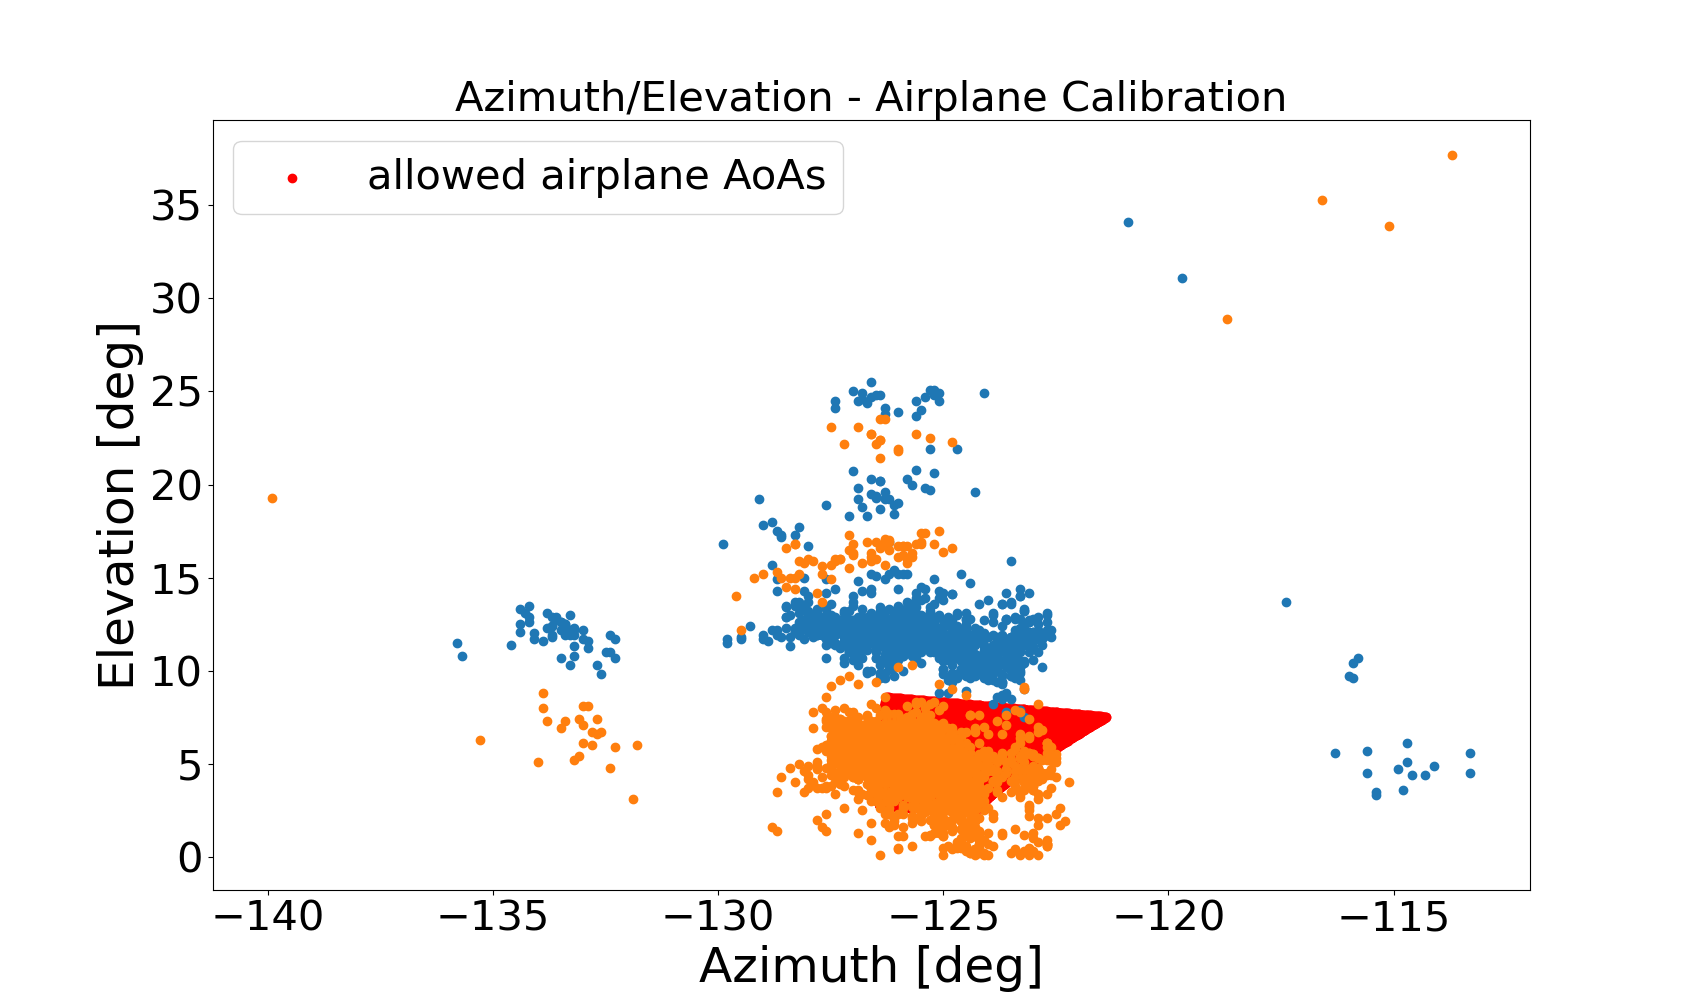

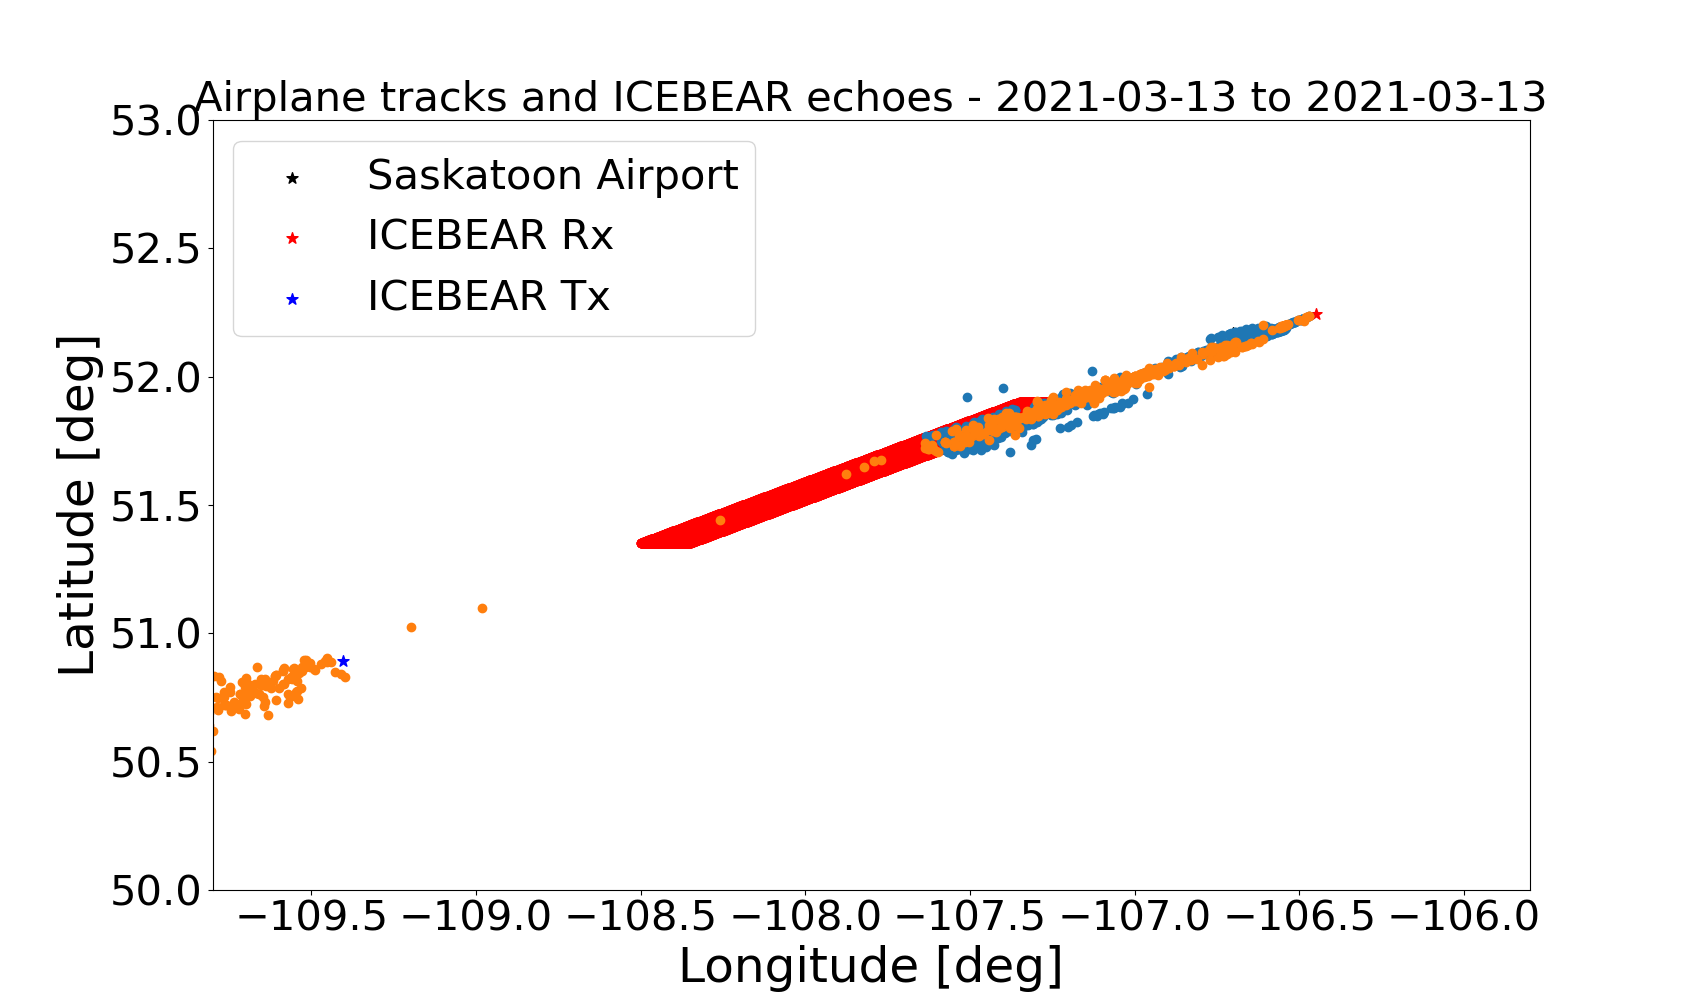

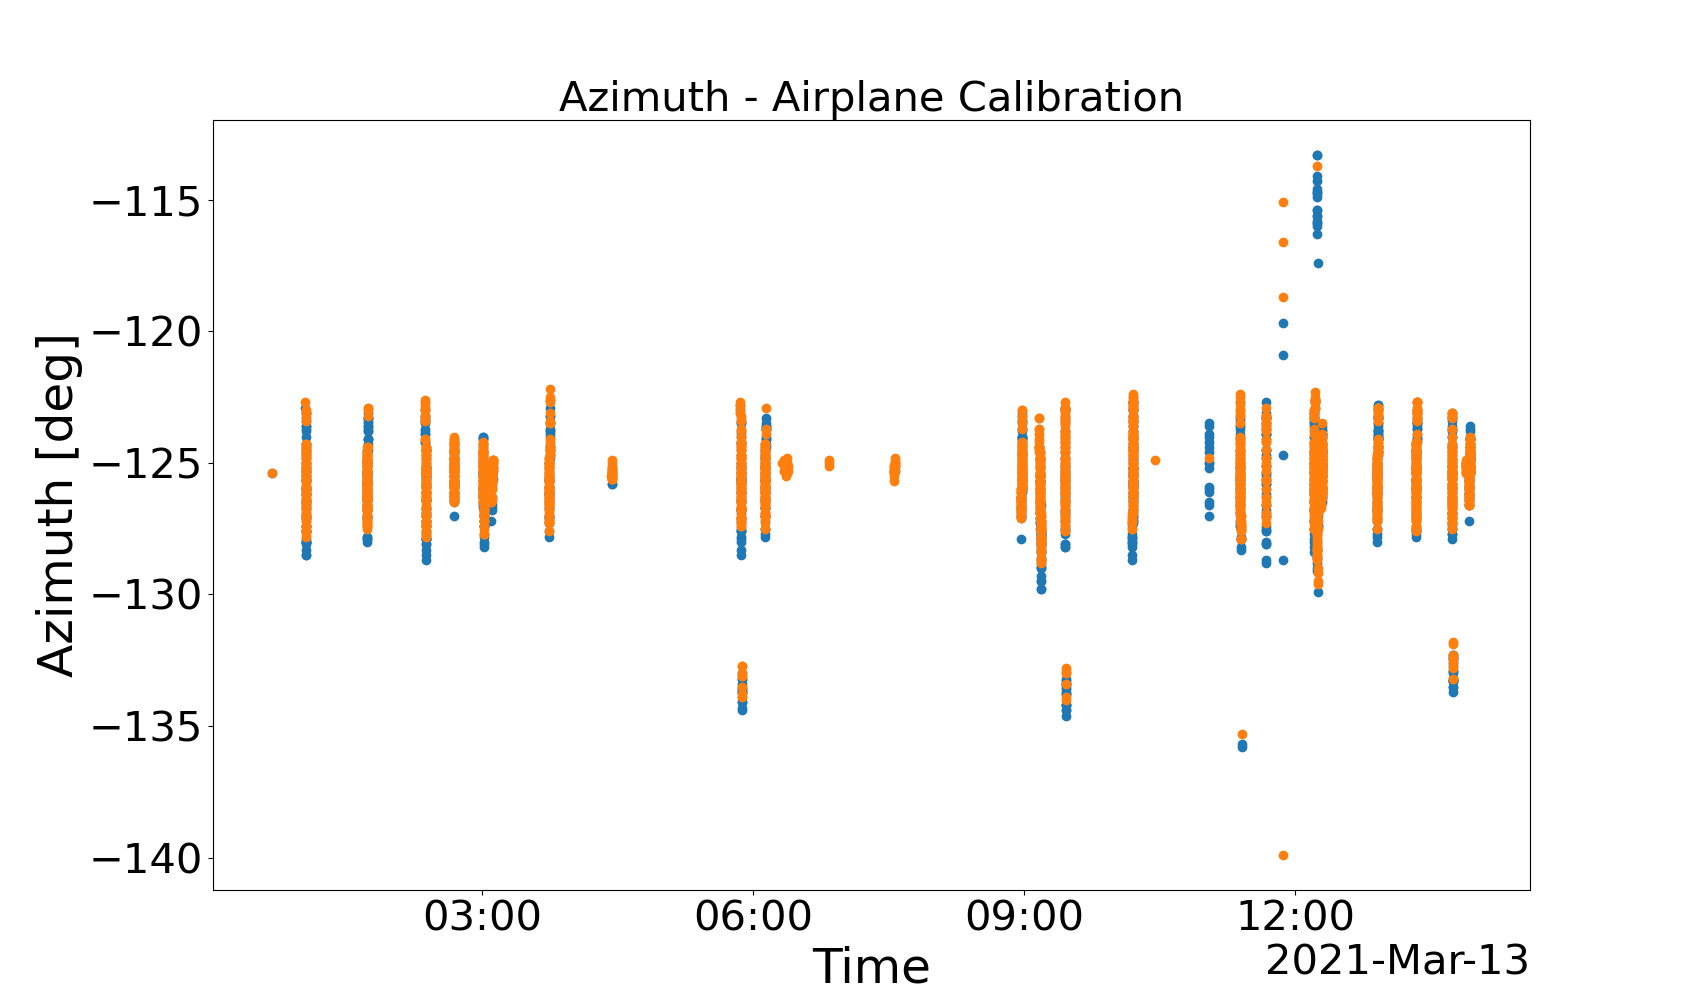

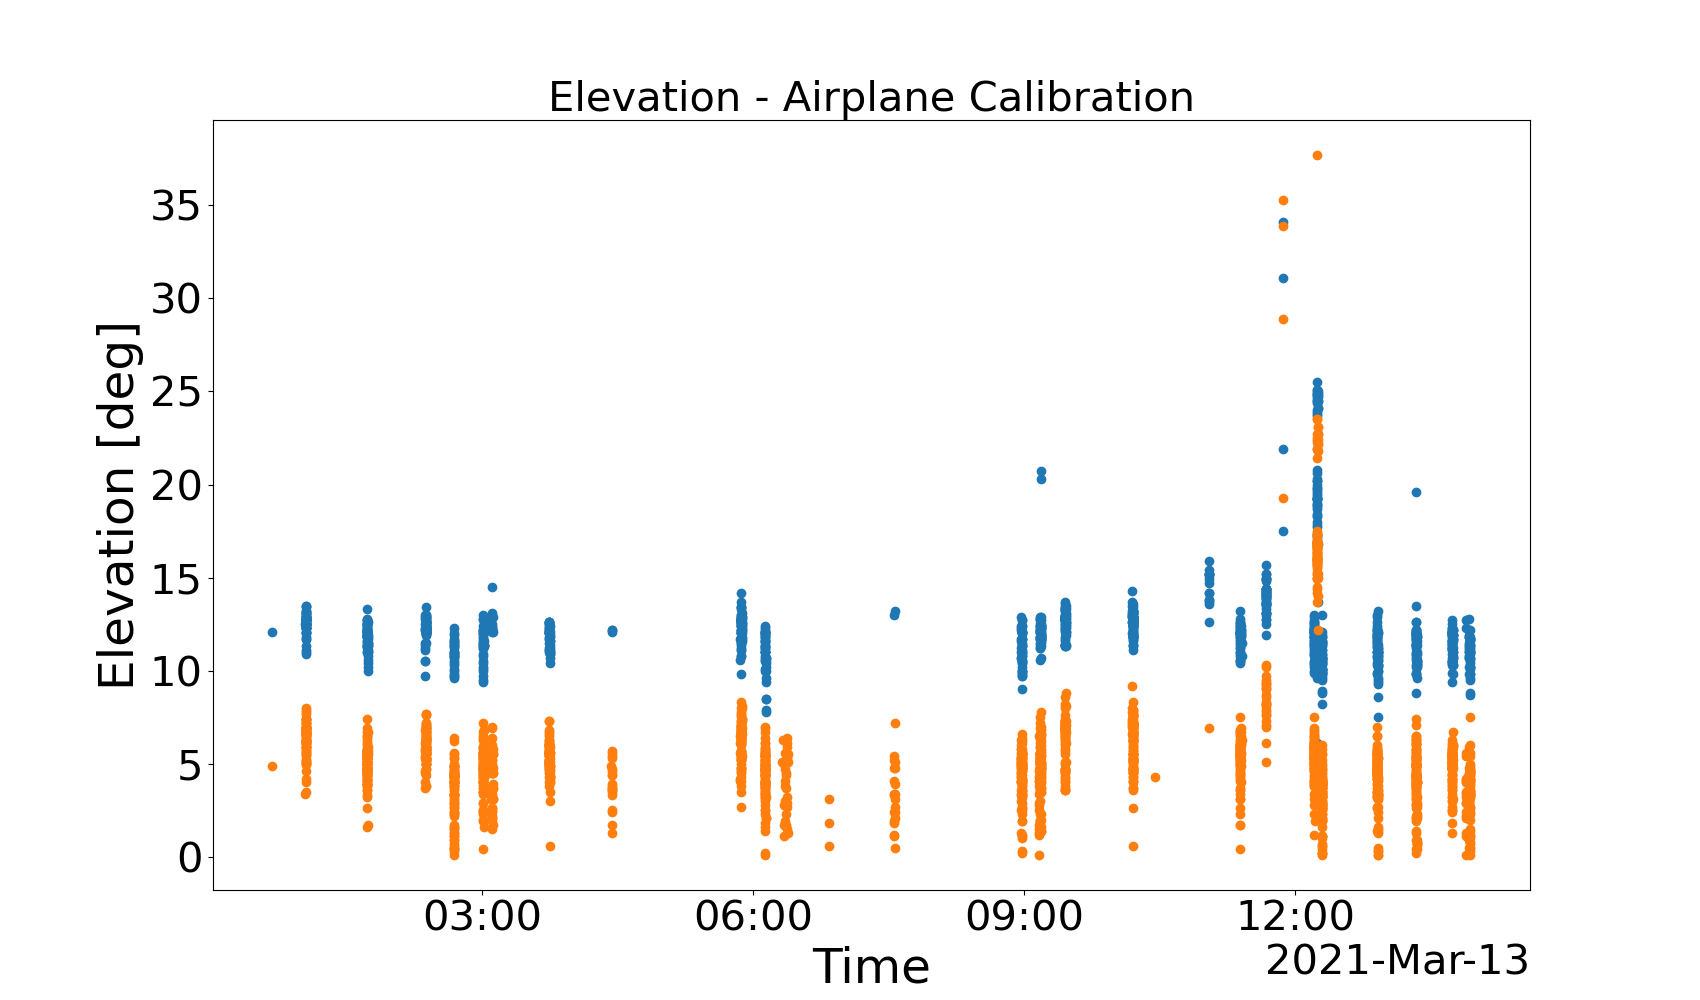

In [21]:
# set up axes
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator)

fig_ll, ax_ll = plt.subplots()
fig_ll.set_size_inches(fig_width_inches, fig_height_inches)
ax_ll.set_ylabel('Latitude [deg]')
ax_ll.set_xlabel('Longitude [deg]')
ax_ll.set_title(f'Airplane tracks and ICEBEAR echoes - {start_time.strftime("%Y-%m-%d")} to {end_time.strftime("%Y-%m-%d")}')
stoon_airport = [52.17145, -106.70039]
icebear_rx = [52.24393, -106.45025]
icebear_tx = [50.89335, -109.40317]
ax_ll.scatter(stoon_airport[1], stoon_airport[0], marker='*', c='black', s=70)
ax_ll.scatter(icebear_rx[1], icebear_rx[0], marker='*', c='r', s=70)
ax_ll.scatter(icebear_tx[1], icebear_tx[0], marker='*', c='b', s=70)
ax_ll.scatter(sx[1, :], sx[0, :], c='red')
ax_ll.set_xlim([-109.8, -105.8])
ax_ll.set_ylim([50, 53])
ax_ll.legend(['Saskatoon Airport','ICEBEAR Rx','ICEBEAR Tx'])

#fig_alt, ax_alt = plt.subplots()
#fig_alt.set_size_inches(fig_width_inches, fig_height_inches)
#ax_alt.set_ylabel('Altitude [km]')
#ax_alt.set_xlabel('Time')
#ax_alt.set_xlim([0, 15])
#ax_alt.set_title(f'Altitude - {descriptor}')
#ax_alt.xaxis.set_major_locator(locator)
#ax_alt.xaxis.set_major_formatter(formatter)

fig_az, ax_az = plt.subplots()
fig_az.set_size_inches(fig_width_inches, fig_height_inches)
ax_az.set_ylabel('Azimuth [deg]')
ax_az.set_xlabel('Time')
ax_az.set_title(f'Azimuth - {descriptor}')
ax_az.xaxis.set_major_locator(locator)
ax_az.xaxis.set_major_formatter(formatter)

fig_el, ax_el = plt.subplots()
fig_el.set_size_inches(fig_width_inches, fig_height_inches)
ax_el.set_ylabel('Elevation [deg]')
ax_el.set_xlabel('Time')
ax_el.set_title(f'Elevation - {descriptor}')
ax_el.xaxis.set_major_locator(locator)
ax_el.xaxis.set_major_formatter(formatter)

fig_azel, ax_azel = plt.subplots()
fig_azel.set_size_inches(fig_width_inches, fig_height_inches)
ax_azel.set_ylabel('Elevation [deg]')
ax_azel.set_xlabel('Azimuth [deg]')
ax_azel.set_title(f'Azimuth/Elevation - {descriptor}')
# plot the allowed az/el polygon (wrt boresight)
az = np.load('allowed_airplane_azimuth.npy')
az = np.where(az > 180.0, az - 360.0, az)
el = np.load('allowed_airplane_elevation.npy')
ax_azel.scatter(az, el, c='red')
ax_azel.legend(['allowed airplane AoAs'])

for file in level2_files:
    print(file)
    try:
        f = h5py.File(file)
    except Exception as e:
        print(f'Excepted {e}\nContinuing...')
        continue
    altitude = f['data']['altitude'][:]
    azimuth = f['data']['azimuth'][:]
    doppler_shift = f['data']['doppler_shift'][:]
    elevation = f['data']['elevation'][:]
    latitude = f['data']['latitude'][:]
    longitude = f['data']['longitude'][:]
    rf_distance = f['data']['rf_distance'][:]
    slant_range = f['data']['slant_range'][:]
    snr_db = f['data']['snr_db'][:]
    time = f['data']['time'][:]
    utc_time = vutcfromtimestamp(time)
    print(azimuth.shape)
    forbidden_days = [12, 14]
    if utc_time[0].day in forbidden_days:
        continue
    
    time_filter = (utc_time <= end_time) & (utc_time >= start_time) 
    #print(rf_distance[time_filter])
    #print(altitude[time_filter])
    range_filter = (rf_distance < 256) & (rf_distance > 246)
    time_filter = time_filter & range_filter

    # plot lat/lon

    #sx = map_target(rx, azimuth[time_filter], elevation[time_filter], slant_range[time_filter])
    #ax_ll.scatter(sx[0, :], sx[1, :])
    
    ax_ll.scatter(longitude[time_filter], latitude[time_filter])
    
    # plot alt/time #NOTE: altitude is useless for airplane echoes because it depends on slant range, which is unattainable
    #ax_alt.scatter(utc_time[time_filter], altitude[time_filter])#, c=snr_db[time_filter])
    
    # plot az and el / time
    ax_az.scatter(utc_time[time_filter], azimuth[time_filter])
    ax_el.scatter(utc_time[time_filter], elevation[time_filter])
    
    # plot az/el
    ax_azel.scatter(azimuth[time_filter], elevation[time_filter])
    f.close()
plt.show()

In [22]:
# aircraft tracks

lons = []
lats = []
sranges = []
times = []

# set aircraft boundaries if downloading the data
bounds = (-109.375, 50.771, -106.0, 52.765) # west, south, east, north

#aircrafts_dbs = ap.load_airplane_data('/home/brian/airplane-process/airplane-code/aircrafts_dbs_2024-08-01_to_2024-08-15.pckl')
aircrafts_dbs = ap.load_airplane_data('/home/ibp2/airplane-process/airplane-code/aircrafts_dbs_2024-08-01_to_2024-08-15.pckl')
#aircrafts_dbs = ap.retrieve_airplane_data(utc_time, time_filter, bounds)

for db in aircrafts_dbs:
    # db is a database of every airplane in the timeframe.
    if db == None:
        continue
    
    # db[i].data.long/lat is the time series of data for one airplane (i)
    for i in range(len(db)): # db[i] is a single airplane in the timeframe.
        if len(db[i].data.timestamp) > 60:
            continue

        start_idx = db[i].data.index[0]
        end_idx = db[i].data.index[-1]
        ti = db[i].data.timestamp[start_idx]
        ti = ti.replace(tzinfo=None)
        tf = db[i].data.timestamp[end_idx]
        tf = tf.replace(tzinfo=None)

        if tf < start_time:
            continue
        if ti > end_time:
            break
        
        # find az/el from lat/long of airplane
        # TODO: use these slant ranges with az/el of echoes to plot the proper lat/lon of the echoes
        
        az, el, slant_range = ap.find_aer_from_receiver(db[i].data.latitude, db[i].data.longitude, db[i].data.altitude / 3.281)
        #az = np.where(az > 180.0, az - 360.0, az)
        range_filter = (slant_range < 150e3) & (slant_range > 70e3)# & (az < -120)
        az = az[range_filter]
        el = el[range_filter]
        time = db[i].data.timestamp[range_filter]

        sranges.append(slant_range[range_filter])
        times.append(time[range_filter])

        if(time.shape[0] == 0):
            continue
        
        # plot az vs time
        ax_az.scatter(time, az-360, c='black')
        ax_azel.scatter(az-360, el, c='black')

        az = -az + 90 # convert to wrt East angles

        ax_el.scatter(time, el, c='black')

        ax_ll.plot(db[i].data.longitude, db[i].data.latitude)
        #ax_alt.scatter(aircrafts_db[i].data.timestamp, aircrafts_db[i].data.altitude / 3.281 / 1000)
        lons.append(db[i].data.longitude)
        lats.append(db[i].data.latitude)


lons = np.hstack(lons)
lats = np.hstack(lats)

times = np.hstack(times)
sranges = np.hstack(srange)


plt.show()

ValueError: need at least one array to concatenate